
<center><h2>Exploratory Data Analysis (EDA)</h2></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

- **Customers**, **Products**, and **Transactions** contain complementary information.  
- So, we gather all the required information (Customers,Products, and Transactions data) into a single dataset for analysis.  
- It helps us to perform detailed exploratory data analysis, build predictive models, and draw conclusions that are important for the business.  


In [2]:
# Loading the datasets
customers_data = pd.read_csv("Customers.csv")
products_data = pd.read_csv("Products.csv")
transactions_data = pd.read_csv("Transactions.csv")

# Merging Transactions with Customers
transactions_customers = pd.merge(transactions_data, customers_data, on="CustomerID", how="left")

# Merging the transactions_customers with Products
dataset = pd.merge(transactions_customers, products_data, on="ProductID", how="left")

# Converting date columns to datetime format for analysis
dataset["TransactionDate"] = pd.to_datetime(dataset["TransactionDate"])
dataset["SignupDate"] = pd.to_datetime(dataset["SignupDate"])

# Displaying the first few rows of the merged dataset
print(dataset.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [3]:
dataset.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Why there are two Price columns?  
This happend during the merge operation from both the datasets(Transactions and Products)  
- **_x**: it had occured from the left dataset (Transactions).
- **_y**: and it was from the right dataset (Products).

In [4]:
# verifying wheteher Price_x and Price_y had any differences.
price_mismatch = dataset[dataset["Price_x"] != dataset["Price_y"]]
print("Price mismatches:\n", price_mismatch)

Price mismatches:
 Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price_x, CustomerName, Region, SignupDate, ProductName, Category, Price_y]
Index: []


- According to the output there is no difference between **Price_x** (from the Transactions dataset) and **Price_y** (from the Products dataset). This indicates that there is consistency in **Price** feature across both the datasets.  
- So, there were no mismatches; we can drop one of the redundant columns.  

In [5]:
# Dropping the redundant column (Price_y)
dataset.drop(columns=["Price_y"], inplace=True)

# Renaming the remained column (Price_x) to "Price"
dataset.rename(columns={"Price_x": "Price"}, inplace=True)

# Displaying the cleaned dataset
print(dataset.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region SignupDate  \
0      300.68  300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68  300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68  300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36  300.68  Travis Campbell  South America 2024-04-11   
4      902.04  300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  
0  ComfortLiving Bluetooth Speaker  Electronics  
1  ComfortLiving Bluetooth Speaker  Electronics  
2  ComfortLiving Blu

In [6]:
dataset.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


What is **TotalValue**?  
In the dataset, **TotalValue** represents the total monetary value of a specific transaction.  
It is calculated as:  

<center><h5>TotalValue = Price × Quantity</h5></center>  

Where:  
- **Price**: The price of a single unit of the product involved in the transaction.  
- **Quantity**: The number of units of the product purchased in that transaction.  


In [7]:
### Verifying and Correcting 'TotalValue' Field

In [8]:
# Validating 'TotalValue'
incorrect_totalvalue = dataset[dataset["TotalValue"] != dataset["Price"] * dataset["Quantity"]]
print(f"Number of incorrect 'TotalValue' rows: {len(incorrect_totalvalue)}")
if len(incorrect_totalvalue) == 0:
    print("All 'TotalValue' calculations are correct.")

Number of incorrect 'TotalValue' rows: 88


In [9]:
# Correcting 'TotalValue' based on 'Price' and 'Quantity' for rows with discrepancies
dataset.loc[dataset["TotalValue"] != dataset["Price"] * dataset["Quantity"], "TotalValue"] = (
    dataset["Price"] * dataset["Quantity"]
)

# Verifying corrections
incorrect_totalvalue_after_correction = dataset[dataset["TotalValue"] != dataset["Price"] * dataset["Quantity"]]

# Displaying the number of discrepancies after correction
print(f"Number of incorrect 'TotalValue' rows after correction: {len(incorrect_totalvalue_after_correction)}")

# Confirming that the incorrect values has been corrected
if len(incorrect_totalvalue_after_correction) == 0:
    print("All discrepancies in 'TotalValue' have been successfully corrected.")


Number of incorrect 'TotalValue' rows after correction: 0
All discrepancies in 'TotalValue' have been successfully corrected.


### Analyzing the Unique Product, Category, and Region Data

In [10]:
# Displaying all unique product names
unique_products = dataset["ProductName"].unique()

# Converting to a DataFrame for a better readability
unique_products_df = pd.DataFrame(unique_products, columns=["ProductName"])

# Displaying the total number of unique products
print(f"Total Unique Products: {len(unique_products)}")

# Displaying the product names
print("\nList of Unique Product Names:")
print(unique_products_df)


Total Unique Products: 66

List of Unique Product Names:
                        ProductName
0   ComfortLiving Bluetooth Speaker
1                 HomeSense T-Shirt
2             ActiveWear Smartphone
3                  TechPro Textbook
4             TechPro Running Shoes
..                              ...
61           HomeSense Cookware Set
62      BookWorld Bluetooth Speaker
63                 SoundWave Laptop
64      SoundWave Bluetooth Speaker
65                SoundWave T-Shirt

[66 rows x 1 columns]


In [11]:
# Displaying all unique product categories
unique_categories = dataset["Category"].unique()

# Converting to a DataFrame for a better readability
unique_categories_df = pd.DataFrame(unique_categories, columns=["Category"])

# Displaying the total number of unique categories
print(f"Total Unique Categories: {len(unique_categories)}")

# Displaying the category names
print("\nList of Unique Product Categories:")
print(unique_categories_df)


Total Unique Categories: 4

List of Unique Product Categories:
      Category
0  Electronics
1     Clothing
2        Books
3   Home Decor


In [12]:
# Displaying all unique regions
unique_regions = dataset["Region"].unique()

# Converting to a DataFrame for a better readability
unique_regions_df = pd.DataFrame(unique_regions, columns=["Region"])

# Displaying the total number of unique regions
print(f"Total Unique Regions: {len(unique_regions)}")

# Displaying the region names
print("\nList of Unique Regions:")
print(unique_regions_df)

Total Unique Regions: 4

List of Unique Regions:
          Region
0         Europe
1           Asia
2  South America
3  North America


### Imputation handling

In [13]:
# Checking for missing values in the dataset
missing_values = dataset.isnull().sum()

# Displaying columns with missing values
print("Missing values in the dataset:")
print(missing_values[missing_values > 0])

# Total number of missing values across all columns
total_missing = dataset.isnull().sum().sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")


Missing values in the dataset:
Series([], dtype: int64)

Total number of missing values in the dataset: 0


- There is no missing values in this dataset.

### Inspecting Column Data Types

In [14]:
# Check and fix data types
print("\nColumn data types:")
print(dataset.dtypes)


Column data types:
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductName                object
Category                   object
dtype: object


### Identifying Outliers (Extreme Values)

In [15]:
# 3. Analyzing the outliers in numerical columns
numerical_cols = ["Price", "Quantity", "TotalValue"]
for col in numerical_cols:
    print(f"\nSummary statistics for {col}:")
    print(dataset[col].describe())


Summary statistics for Price:
count    1000.00000
mean      272.55407
std       140.73639
min        16.08000
25%       147.95000
50%       299.93000
75%       404.40000
max       497.76000
Name: Price, dtype: float64

Summary statistics for Quantity:
count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

Summary statistics for TotalValue:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


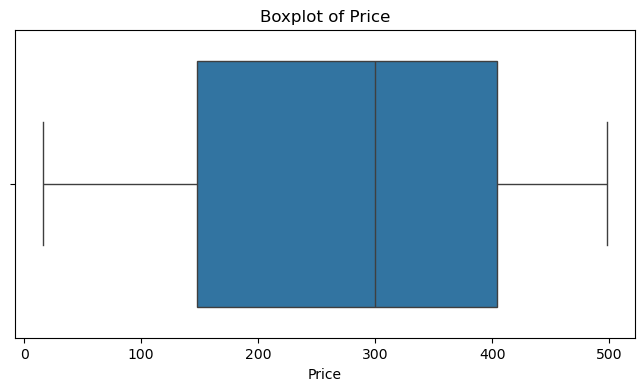

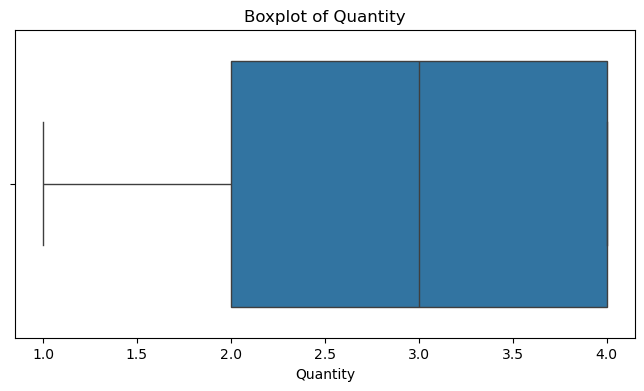

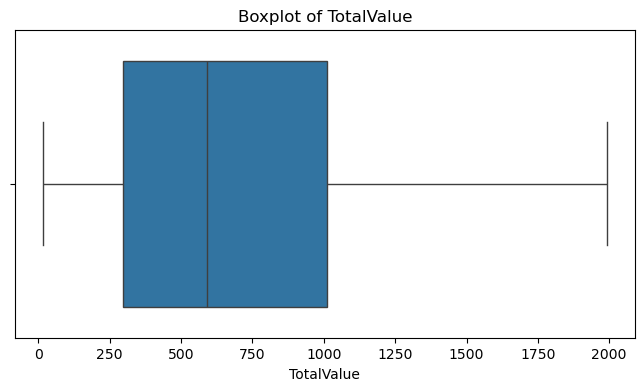

In [16]:
# Visualizing the outliers using boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

- **Price**: The values are distributed between 16 and 498.    
- **Quantity**: The range of Quantity is well-defined between 1 and 4.    
- **TotalValue**: The values range from about 16 to about 1991.
  
All three numerical columns (Price, Quantity, TotalValue) are clean and does not have any outliers.  

In [17]:
dataset.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


<center><h2>Business Insights</h2></center>

In [18]:
# 1. Total revenue generated
total_revenue = dataset["TotalValue"].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $689995.56


- The total revenue generated from all transactions in the dataset amount is $689,995.56.
- This value represents the cumulative sales from all customers, products, and regions.

In [19]:
# 2. Revenue by region
revenue_by_region = dataset.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nRevenue by Region:")
print(revenue_by_region)


Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


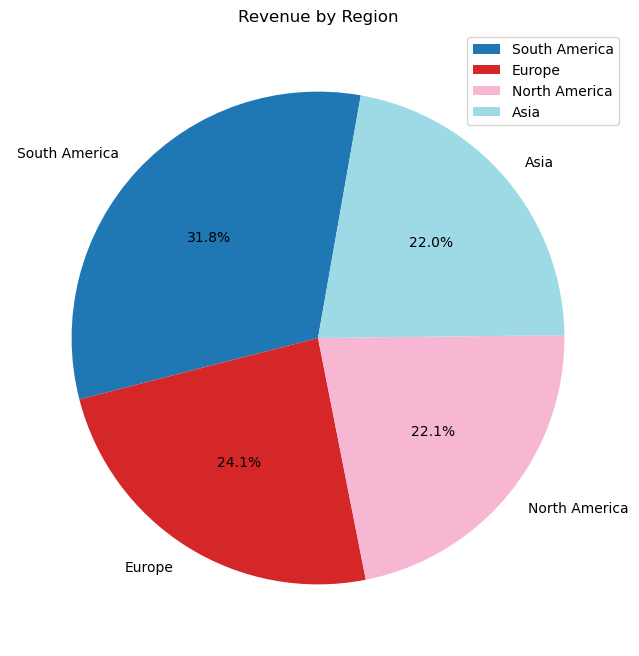

In [20]:
# Pie chart for revenue by region
plt.figure(figsize=(8, 8))
revenue_by_region.plot(kind="pie", autopct='%1.1f%%', startangle=80, cmap="tab20", legend=True)
plt.title("Revenue by Region")
plt.ylabel("")
plt.show()


- **South Africa** comes in first place contributing **31.8%** of the revenue, which is **219,352.56** dollars, indicating a strong customer base in this region.  
- **Europe** is the second-highest revenue-generating region with **24.1%** at **166,254.63** dollars, followed by **North America (22.1%)** and **Asia (22.0%)**.  
- The relatively balanced revenue distribution across regions suggests a diverse global presence with opportunities for growth in **Asia** and **North America**.  
- Since they contribute significantly to revenue, marketing and retention initiatives can prioritize **South Africa** and **Europe**.  


In [21]:
# 3. Top-selling product categories
top_categories = dataset.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nTop-Selling Product Categories:")
print(top_categories)


Top-Selling Product Categories:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


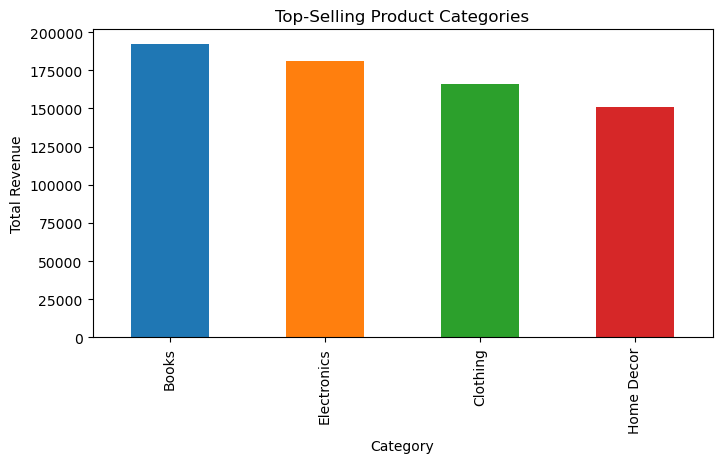

In [22]:
# Revenue by category
plt.figure(figsize=(8, 4))
top_categories.plot(kind="bar", color=sns.color_palette("tab10", len(top_categories)))
plt.title("Top-Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()


- The highest revenue of **192,147.47 dollars** earns by books, It had contributed significantly to the total sales.  
- Electronics with revenue of **180,783.50 dollars** holds the second rank,and it showcasing the popularity of tech-related products.  
- Clothing and Home Decor follows closely with revenues of **166,170.66 dollars** and **150,893.93 dollars**, respectively.  
- These four categories represent the primary revenue makers for the business.  
- While improving pricing and promotions in clothing and home décor might improve their performance, concentrating on growing inventory and marketing initiatives for books and electronics can further raise revenue growth.  

In [23]:
# 4. Most purchased products
most_purchased_products = dataset.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nMost Purchased Products:")
print(most_purchased_products)


Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


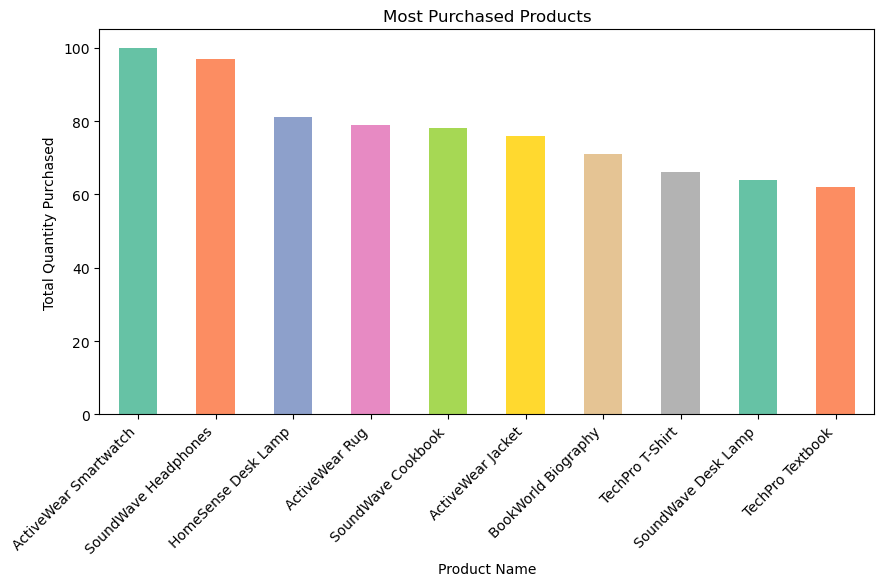

In [24]:
# Bar chart for most purchased products
plt.figure(figsize=(10, 5))
most_purchased_products.plot(kind="bar", color=sns.color_palette("Set2", len(most_purchased_products)))
plt.title("Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=45, ha="right")  
plt.show()

- **ActiveWear Smartwatch** is the most purchased unit, indicating strong customer demand by selling **100 units** as the highest.  
- Relatively, **SoundWave Headphones** and **HomeSense Desk Lamp** were sold at **97** and **81 units**, respectively, representing their popularity.  
- Products from different categories, including **electronics**, **home decor**, and **books**, dominate the top 10 list, reflecting diverse customer preferences.  
- The existence of goods like the **TechPro Textbook** and **SoundWave Cookbook** emphasizes the importance of lifestyle and educational items.  
- Maintaining strong sales volume can be achieved by focusing on inventories for these high-performing products.

In [25]:
# 5. Transactions over time
dataset["TransactionMonth"] = dataset["TransactionDate"].dt.to_period("M")
monthly_transactions = dataset.groupby("TransactionMonth")["TransactionID"].count()
print("\nMonthly Transactions:")
print(monthly_transactions)


Monthly Transactions:
TransactionMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: TransactionID, dtype: int64


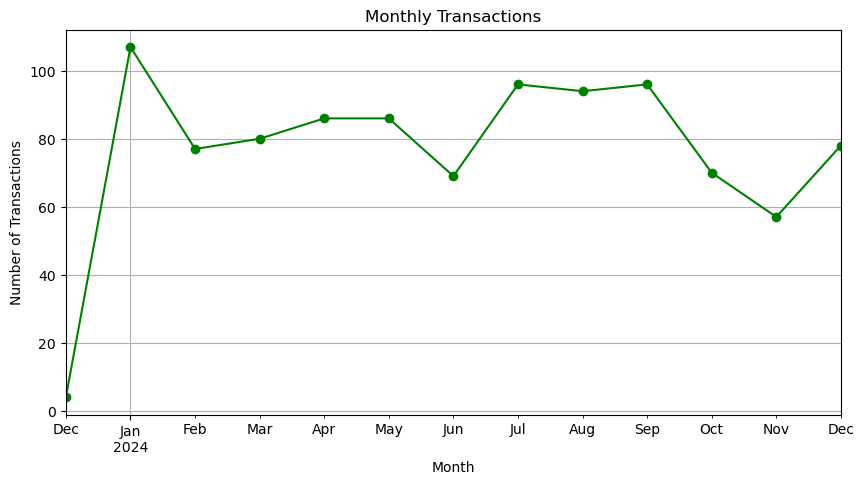

In [26]:
# Monthly transactions
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind="line", marker="o", color="green")
plt.title("Monthly Transactions")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

- **January 2024** was the month with the most number of transactions (**107**), which can be attributed to strong post-holiday shopping or new year promotions.  
- There is a more consistent level of transactions through most months, with a slight dip in **June (69)** and **November (57)**.  
- The **December** numbers show a recovery of sorts (**78 transactions**), which could be attributed to pre-holiday shopping.  
- The trends show peaks in customer activity in **January** and **December**; therefore, targeted marketing and promotional campaigns can capitalize on this.  
- Perhaps targeting the lower transaction periods, such as **November**, with seasonal offers or campaigns could help smooth out the transaction consistency throughout the year.  


In [27]:
# 5. Top 10 customers who spent the most money
top_spending_customers = dataset.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Spending:")
print(top_spending_customers)


Top 10 Customers by Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


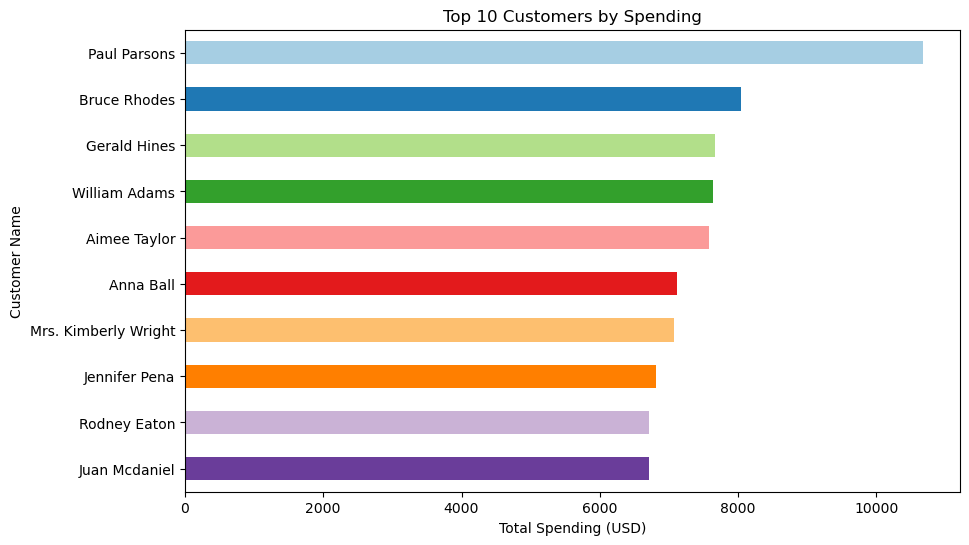

In [28]:
# Horizontal bar chart for top 10 customers by spending
plt.figure(figsize=(10, 6))
top_spending_customers.plot(kind="barh", color=sns.color_palette("Paired", len(top_spending_customers)))
plt.title("Top 10 Customers by Spending")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.gca().invert_yaxis()  # Invert y-axis to display the highest spender at the top
plt.show()


- **Paul Parsons** is the biggest spender, accounting for **10,673.87 dollars** of the total revenue, whereas **Bruce Rhodes** is second with **8,040.39 dollars**.
- The top 10 customers are responsible for a large share of the total revenue, which underscores the role of high-value customers for business continuity.
- Keeping such loyal, high spending customers as customers and offering them personal offers and loyalty programs may only increase the revenue. 
- There are ways to encourage repeat purchases and increase the **customer lifetime value (CLV)** through targeted marketing campaigns.
- This paper recommends that future work should attempt to capture and analyse the purchasing behaviour of these customers so that product recommendations and services can be better tailored to meet their needs.

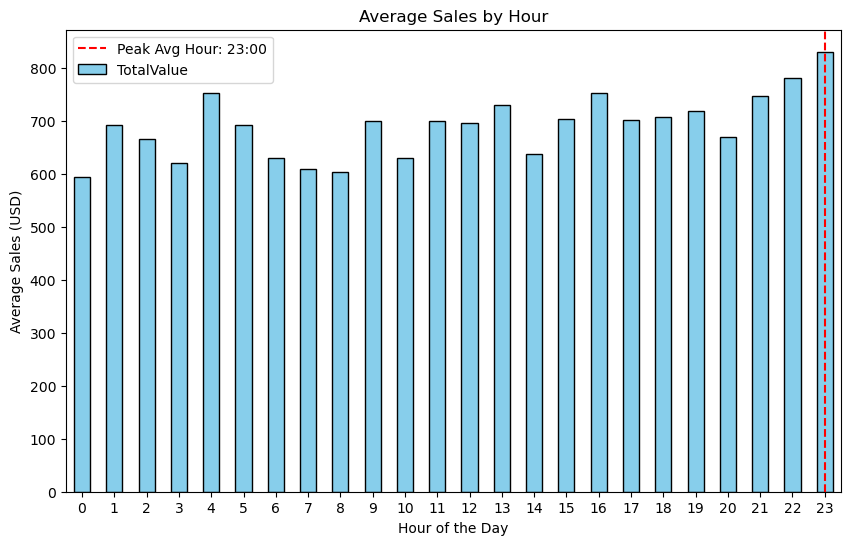

The peak average sales occur at 23:00 with an average sale of $831.46.


In [29]:
# Extracting hour from TransactionDate
dataset["TransactionHour"] = dataset["TransactionDate"].dt.hour

# Calculating average sales per hour across all days
average_hourly_sales = dataset.groupby("TransactionHour")["TotalValue"].mean()

# Identifying the peak hour for average sales
peak_avg_hour = average_hourly_sales.idxmax()
peak_avg_sales = average_hourly_sales.max()

# Bar chart for average sales by hour
plt.figure(figsize=(10, 6))
average_hourly_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Sales by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Sales (USD)")
plt.xticks(rotation=0)
plt.axvline(x=peak_avg_hour, color="red", linestyle="--", label=f"Peak Avg Hour: {peak_avg_hour}:00")
plt.legend()
plt.show()

# Print the peak average hour
print(f"The peak average sales occur at {peak_avg_hour}:00 with an average sale of ${peak_avg_sales:.2f}.")


- The peak average sales occur at **11 PM (23:00)**, with an average transaction value of **831.46 dollars**.  
- Late-night shopping activity might indicate a preference for convenience, possibly from working professionals or online shoppers.  
- This insight highlights the importance of ensuring website or store availability during late hours to accommodate high-value customers.  
- Marketing campaigns and promotions scheduled for the late evening could further capitalize on this peak shopping period.  
- Deeper understanding of the tastes and purchase patterns of customers may be obtained by examining their profiles that were active during this hour.  
